## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import pandas as pd
from numpy.linalg import inv
from numpy import abs
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [4]:
x_train_C0 = x_train[np.where(y_train == 0)]
x_train_C1 = x_train[np.where(y_train == 1)]
print(x_train_C0.shape)
print(x_train_C1.shape)

(1869, 2)
(1881, 2)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [5]:
m0 = np.mean(x_train_C0, axis=0)
m1 = np.mean(x_train_C1, axis=0)

In [6]:
print(f"mean vector of class 1: {m0}", f"mean vector of class 2: {m1}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [7]:
sw = np.zeros((2, 2))
for i in range(x_train_C0.shape[0]):
    v = x_train_C0[i] - m0
    sw += np.outer(v, v)
for i in range(x_train_C1.shape[0]):
    v = x_train_C1[i] - m1
    sw += np.outer(v, v)

In [8]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [9]:
M0 = m0.reshape(m0.shape[0], 1)
M1 = m1.reshape(m1.shape[0], 1)
v = m1 - m0
sb = np.outer(v, v)

In [10]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [11]:
w = inv(sw) @ (M1 - M0)


In [12]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.000224  ]
 [ 0.00056237]]


In [13]:
w.T

array([[-0.000224  ,  0.00056237]])

## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [14]:
proj_C0 = w.T @ x_train_C0.T
proj_C1 = w.T @ x_train_C1.T
proj = w.T @ x_test.T
print(proj_C0.shape)
print(proj_C1.shape)
print(proj.shape)
print(proj_C0)
print(proj)

(1, 1869)
(1, 1881)
(1, 1250)
[[-0.00162301 -0.00053729 -0.00059806 ... -0.00039839 -0.0006215
   0.00074764]]
[[-5.35274794e-05  9.09614913e-04 -1.76829837e-04 ...  2.32993081e-03
   1.12052286e-03  1.50407020e-03]]


In [15]:
# KNN
for k in range(1, 6):
    y_pred = []
    for i in range(proj.shape[1]):
        dist = []
        for j in range(proj_C0.shape[1]):
            dist.append(((proj[0][i] - proj_C0[0][j]) ** 2, 0))

        for j in range(proj_C1.shape[1]):
            dist.append(((proj[0][i] - proj_C1[0][j]) ** 2, 1))

        dist.sort()

        cls_0 = cls_1 = 0
        for j in range(k):  # k nearest
            if dist[j][1] == 0:
                cls_0 += 1
            else:
                cls_1 += 1

        if cls_0 > cls_1:
            y_pred.append(0)
        else:
            y_pred.append(1)

    acc = accuracy_score(y_test, y_pred)
    print(f'k = {k}')
    print(f"Accuracy of test-set {acc}")

k = 1
Accuracy of test-set 0.8488
k = 2
Accuracy of test-set 0.8312
k = 3
Accuracy of test-set 0.8792
k = 4
Accuracy of test-set 0.8744
k = 5
Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [16]:
x0_C0, x1_C0 = x_train_C0.T[0], x_train_C0.T[1] # x0
x0_C1, x1_C1 = x_train_C1.T[0], x_train_C1.T[1] # x1
X = np.linspace(-2, 2, 10)
m = w[1] / w[0]
Y = m * X
print(m)

[-2.51059716]


In [17]:
proj_coord_C0 = x_train_C0 @ w.reshape(w.shape[0], 1) / np.sum(w ** 2) * w.reshape(1, w.shape[0])
proj_coord_C1 = x_train_C1 @ w.reshape(w.shape[0], 1) / np.sum(w ** 2) * w.reshape(1, w.shape[0])

print((x_train_C0 @ w.reshape(w.shape[0], 1) / np.sum(w ** 2))[10])
print(w)
print(proj_coord_C0[10])

x0_proj_C0, x1_proj_C0 = proj_coord_C0.T[0], proj_coord_C0.T[1]
x0_proj_C1, x1_proj_C1 = proj_coord_C1.T[0], proj_coord_C1.T[1]

[-195.97648126]
[[-0.000224  ]
 [ 0.00056237]]
[ 0.04389838 -0.11021116]


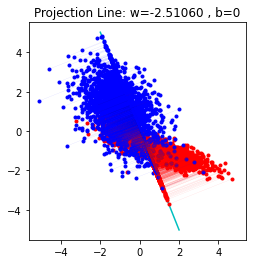

In [27]:
plt.plot(x0_C0, x1_C0, 'r.') # class 0 point
plt.plot(x0_C1, x1_C1, 'b.') # class 1 point
plt.plot(X, Y, 'c') # projection line
plt.plot(x0_proj_C0, x1_proj_C0, 'r.')   # class 0 projection point
plt.plot(x0_proj_C1, x1_proj_C1, 'b.')   # class 1 projection point

for i in range(x0_C0.shape[0]): # class 0 projection connection
    plt.plot([x0_C0[i], x0_proj_C0[i]], [x1_C0[i], x1_proj_C0[i]], 'r:', linewidth=0.1)

for i in range(x0_C1.shape[0]): # class 1 projection connection
    plt.plot([x0_C1[i], x0_proj_C1[i]], [x1_C1[i], x1_proj_C1[i]], 'b:', linewidth=0.1)

plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.axis('square')
plt.title(f'Projection Line: w=%.5f , b=0' % m)
plt.show()